<a href="https://colab.research.google.com/github/burakgorentas/LexSentiment/blob/main/Federal_Artificial_Intelligence_Risk_Management_Act_of_2023_DUYGU_ANAL%C4%B0Z%C4%B0_08022025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()
filename = list(uploaded.keys())[0]  # Yüklenen dosyanın adını alır


Saving Federal Artificial Intelligence Risk Management Act of 2023.txt to Federal Artificial Intelligence Risk Management Act of 2023.txt


In [ ]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

nltk.download('punkt_tab')
nltk.download('stopwords')

# Dosyayı okuma
with open(filename, "r", encoding="latin-1") as file:
    text = file.read().lower()

# Özel karakterleri temizleme
text = re.sub(r'\d+', '', text)  # Sayıları kaldır
text = re.sub(r'[^\w\s]', '', text)  # Noktalama işaretlerini kaldır

# Kelimeleri tokenize etme
tokens = word_tokenize(text)

# Stopwords ve kısa kelimeleri kaldırma
stop_words = set(stopwords.words("english"))
special_words = {"fmt", "jkt", "apr", "frm", "sep", "verdate", "sfmt", "ssavage", "ebillshih", "ebillshrih", "lapjgwlpyrod", "dskbfkhbprod", "pamtmann", "ebillssis","dskbchbprod"}
filtered_tokens = [word for word in tokens if word not in stop_words and word not in special_words and len(word) > 2]

# 1 veya 2 kelimelik ifadeleri kaldır
word_freq = Counter(filtered_tokens)
cleaned_text = " ".join([word for word in filtered_tokens if word_freq[word] > 2])


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


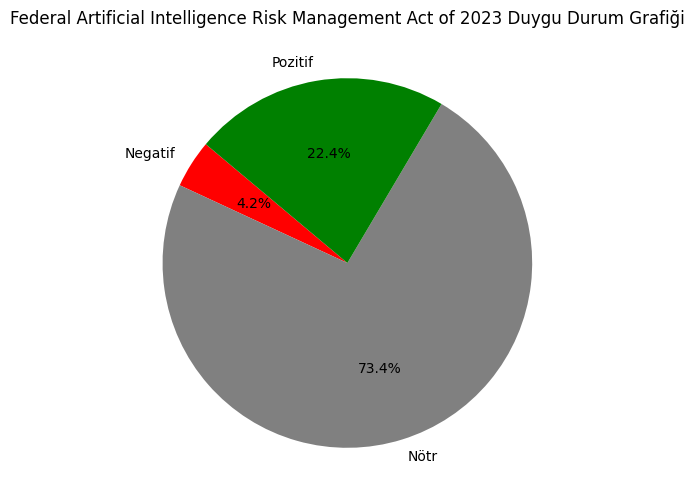

In [ ]:
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
sentiment_scores = sia.polarity_scores(cleaned_text)

# Pasta grafiği için duygu oranlarını çıkaralım
labels = ['Negatif', 'Nötr', 'Pozitif']
sizes = [sentiment_scores['neg'], sentiment_scores['neu'], sentiment_scores['pos']]
colors = ['red', 'gray', 'green']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("Federal Artificial Intelligence Risk Management Act of 2023 Duygu Durum Grafiği")
plt.show()


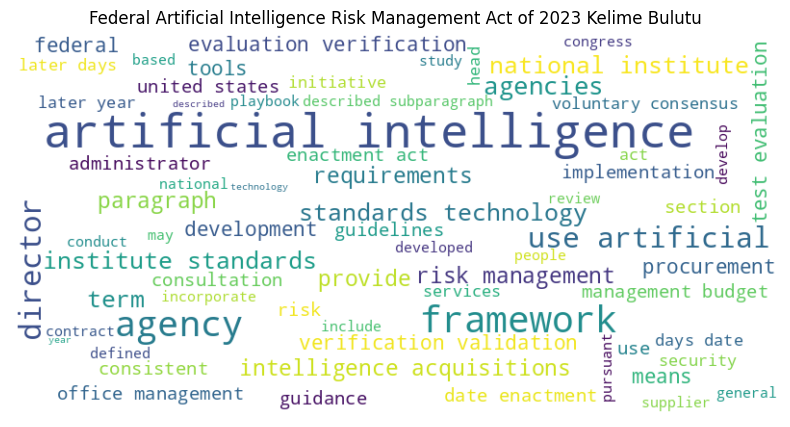

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cleaned_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Federal Artificial Intelligence Risk Management Act of 2023 Kelime Bulutu")
plt.show()


<ipython-input-6-aaafe8d9d388>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frekans', y='Kelime', data=df, palette='viridis')


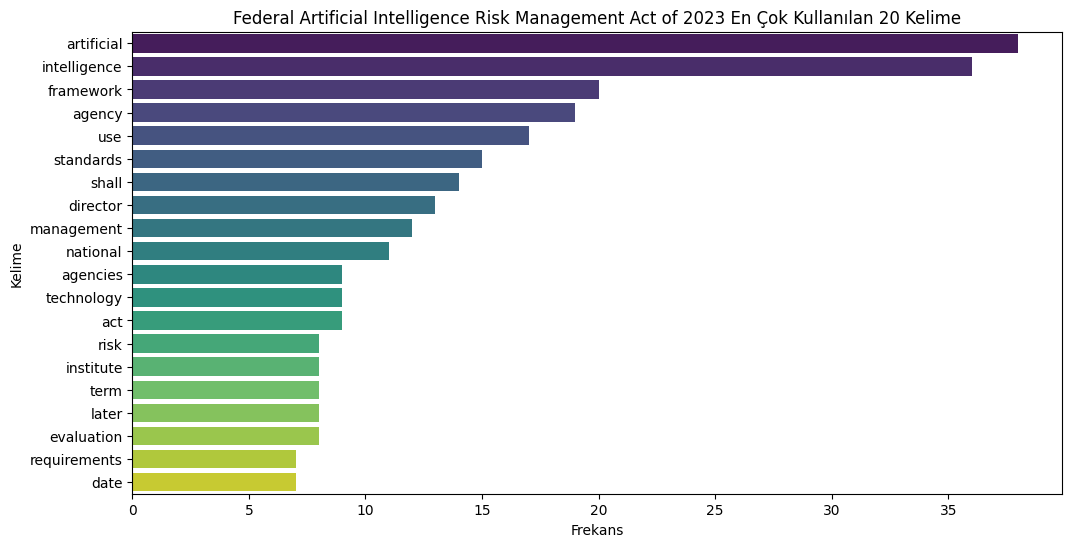

In [ ]:
import pandas as pd
import seaborn as sns

word_counts = Counter(filtered_tokens)
common_words = word_counts.most_common(20)

df = pd.DataFrame(common_words, columns=['Kelime', 'Frekans'])

plt.figure(figsize=(12,6))
sns.barplot(x='Frekans', y='Kelime', data=df, palette='viridis')
plt.xlabel("Frekans")
plt.ylabel("Kelime")
plt.title("Federal Artificial Intelligence Risk Management Act of 2023 En Çok Kullanılan 20 Kelime")
plt.show()


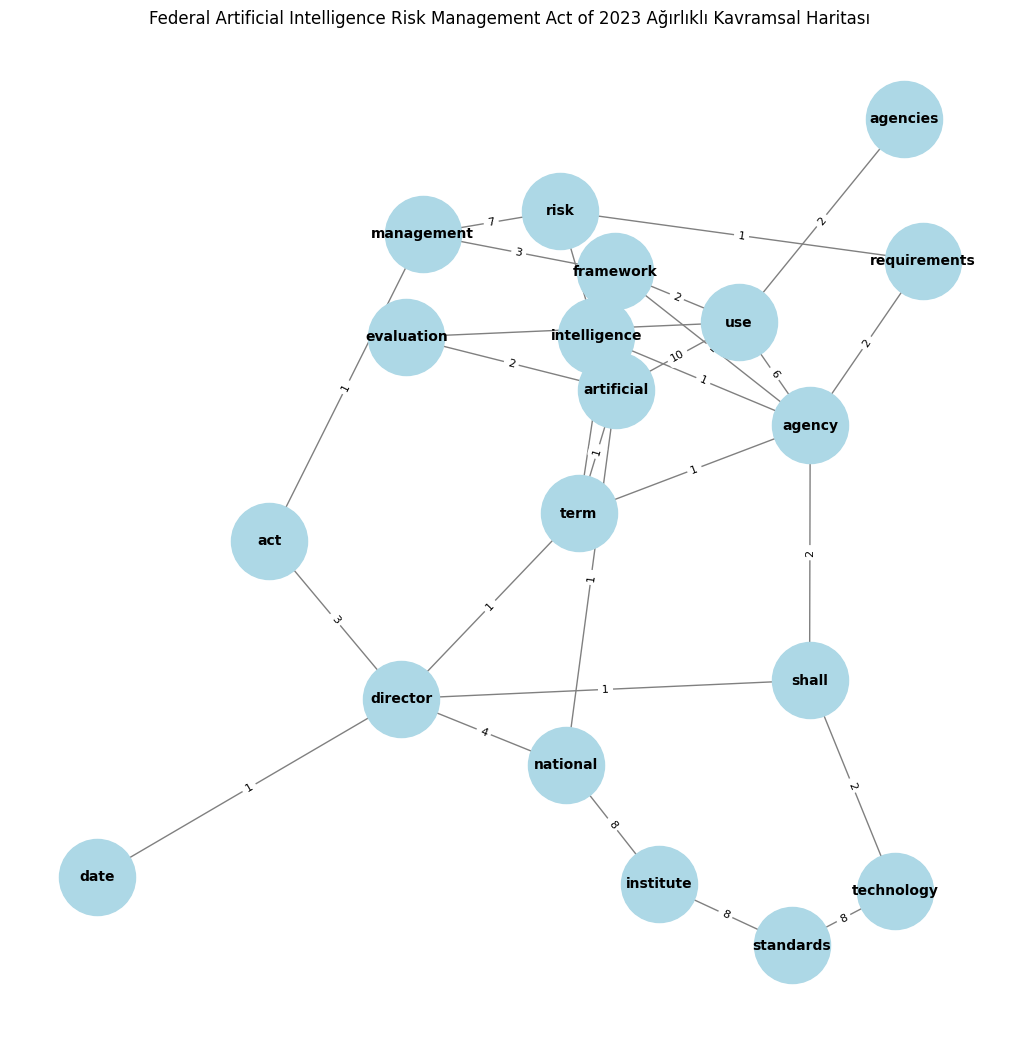

In [ ]:
import networkx as nx

# En çok geçen 20 kelimeyi al
top_words = [word for word, freq in common_words]

# Kelimeler arasındaki ilişkileri belirlemek için basit bir ortak geçiş analizi yapalım
word_pairs = [(word1, word2) for word1 in top_words for word2 in top_words if word1 != word2]

# Kelime çiftlerinin ağırlıklarını hesaplayalım
co_occurrences = Counter()
for i in range(len(filtered_tokens)-1):
    if filtered_tokens[i] in top_words and filtered_tokens[i+1] in top_words:
        co_occurrences[(filtered_tokens[i], filtered_tokens[i+1])] += 1

# Ağırlıklı ağ grafiği oluştur
G = nx.Graph()

for (word1, word2), weight in co_occurrences.items():
    G.add_edge(word1, word2, weight=weight)

plt.figure(figsize=(10,10))
pos = nx.spring_layout(G, seed=42)
edges = G.edges(data=True)

# Kenarları ağırlıklı göstermek için çizgileri ince yapalım
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=3000, edge_color="gray", font_size=10, font_weight="bold")
edge_labels = {(word1, word2): f"{weight['weight']}" for word1, word2, weight in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.title("Federal Artificial Intelligence Risk Management Act of 2023 Ağırlıklı Kavramsal Haritası")
plt.show()
